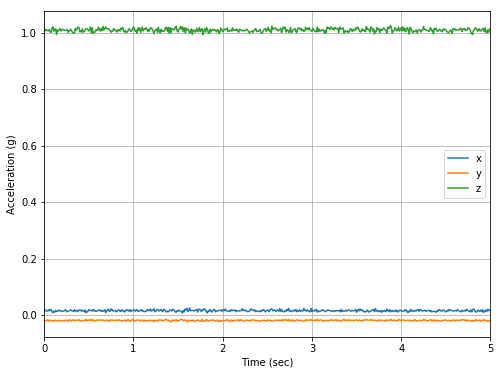

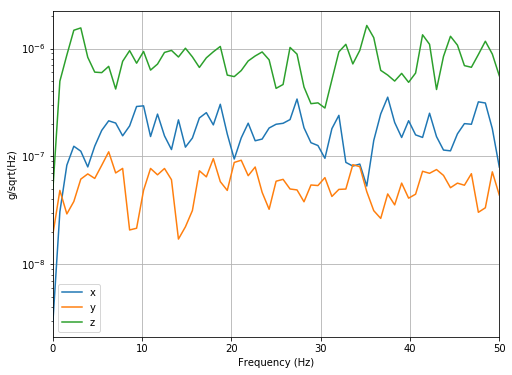

In [54]:
import struct
from numpy import *
from matplotlib.pyplot import *
from scipy import signal

# READ FILE
fileName = 'gcam1-acc1-2020-0415-164300'
fileTime = time.strptime(fileName[11:],'%Y-%m%d-%H%M%S')

with open(fileName,'rb') as fp:
    data_ = fp.read()
n = int(len(data_)/(8*3))
data = []
for i in range(n):
    data.append(struct.unpack('<ddd',data_[i*24:(i+1)*24]))
acc = array(data).T

Fs = 100
dt = 1.0/Fs
time = dt*array(range(n))

figure(1, figsize=(8,6))
plot(time,acc[0,:],label='x')
plot(time,acc[1,:],label='y')
plot(time,acc[2,:],label='z')
xlabel('Time (sec)')
ylabel('Acceleration (g)')
legend()
grid(True)
xlim([0 ,n*dt])


F, Pxx = signal.welch(signal.detrend(acc),Fs,nperseg=2**7)

figure(2,figsize=(8,6))
semilogy(F,Pxx[0,:],label='x')
semilogy(F,Pxx[1,:],label='y')
semilogy(F,Pxx[2,:],label='z')
xlabel('Frequency (Hz)')    
ylabel('g/sqrt(Hz)')
xlim([0, Fs/2])
legend() 
grid(True)


reportPath = 'plots/'
figure(1).savefig(reportPath+"{}-th.png".format(fileName[:-4]), bbox_inches='tight', dpi=300)
figure(2).savefig(reportPath+"{}-psd.png".format(fileName[:-4]), bbox_inches='tight', dpi=300)

## Classify

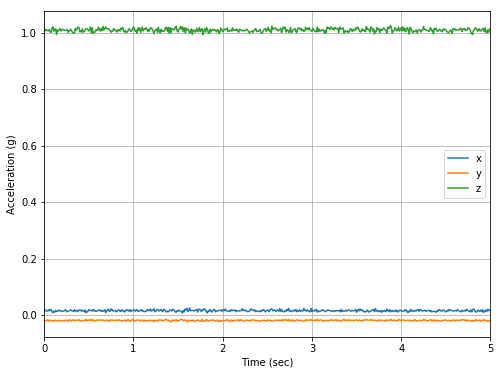

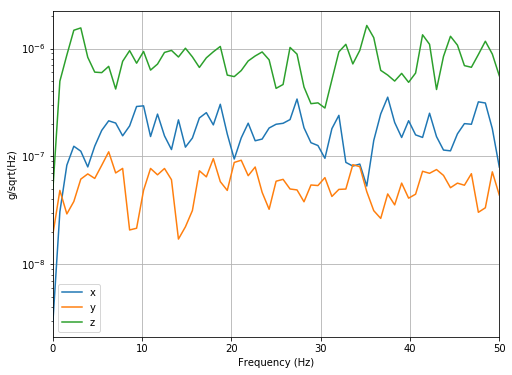

In [57]:
import struct
from numpy import *
from matplotlib.pyplot import *
from scipy import signal

class guymon:
    def __init__(self):
        self.time = []
        self.acc = []
        self.Fs = 100.0
        self.dt = 1/self.Fs
        self.fileName = []
        self.fileTime = []
        self.npt = 0
    def load(self, fileName):
        # READ FILE
        self.fileName = fileName
        self.fileTime = time.strptime(fileName[11:],'%Y-%m%d-%H%M%S')

        with open(fileName,'rb') as fp:
            data_ = fp.read()
        self.npt = int(len(data_)/(8*3))
        data = []
        for i in range(n):
            data.append(struct.unpack('<ddd',data_[i*24:(i+1)*24]))
        self.acc = array(data).T
        self.time = self.dt*array(range(self.npt))
        return self.time, self.acc
    
    def genPlots(self,path):
        
        figure(1, figsize=(8,6))
        plot(self.time,self.acc[0,:],label='x')
        plot(self.time,self.acc[1,:],label='y')
        plot(self.time,self.acc[2,:],label='z')
        xlabel('Time (sec)')
        ylabel('Acceleration (g)')
        legend()
        grid(True)
        xlim([0 ,self.npt*self.dt])

        F, Pxx = signal.welch(signal.detrend(self.acc),Fs,nperseg=2**7)
        figure(2,figsize=(8,6))
        semilogy(F,Pxx[0,:],label='x')
        semilogy(F,Pxx[1,:],label='y')
        semilogy(F,Pxx[2,:],label='z')
        xlabel('Frequency (Hz)')    
        ylabel('g/sqrt(Hz)')
        xlim([0, Fs/2])
        legend() 
        grid(True)

        figure(1).savefig(path+"{}-th.png".format(fileName[:-4]), bbox_inches='tight', dpi=300)
        figure(2).savefig(path+"{}-psd.png".format(fileName[:-4]), bbox_inches='tight', dpi=300)
        

    
gmo = guymon()
fileName = 'gcam1-acc1-2020-0415-164300'
gmo.load(fileName)
gmo.genPlots('plots/')

In [32]:
# acc=acc.T
acc.shape
Pxx.shape


(3, 129)